## **VIRTUAL PROJECT ONE**

### **CASE SCENARIO:**
#### The Company operates a fully on-site work model, has balanced
#### gender representation on its board, supports the learning and
#### growth aspirations of the employees in form of education grants
#### where eligible.
#### You just resumed your role as a Consulting Data Analyst at PwC
#### and Indicino has reached out to your Company to help solve this
#### troubling challenge. Your manager has assigned this task to you
#### as your first deliverable on the job, to analyze Indicino’s
#### provided data, give your insights and recommendation.

### **CASE QUESTIONS:**
#### **1. Identify the root cause(s) of attrition in the Company**
#### **2. Predict the job roles that are likely to resign the company**
#### **within the current year and why?**
#### **3. What age band (s) are likely to be retained?**
#### **4. If you were the Group Head of Indicino’s HR, what would**
#### **you do differently?**
#### **5. Does the length of stay with the current manager have**
#### **any impact on the reason(s) you have identified in 1**
#### **above?**
#### **6. Give insights to the performance and rewards culture at**
#### **Indicino**
#### **7. Present your insights and recommendations with**
#### **appropriate charts**

In [114]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from plotly import graph_objects as go

In [79]:
# Import the data into Jupyter notebook
filepath = r"C:\Users\User\Downloads\Indicino project.xlsx"
df = pd.read_excel(filepath)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [80]:
# Categorize attrition into numeric:
df['EmployeeTurnOver'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [81]:
# Categorizing overtime into numeric for better insight
df['OverTime_check'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,0


### Question 1: Identify the root causes of attrition in Idicino Company

In [8]:
# Highlighting features to determine possible causes of attrition:
df_features = [
'OverTime_check', 'DistanceFromHome', 
'JobSatisfaction', 'RelationshipSatisfaction', 
'WorkLifeBalance',
'EnvironmentSatisfaction', 'MonthlyIncome',
'YearsAtCompany', 'YearsWithCurrManager'

]

In [9]:
print(df[df_features + ['EmployeeTurnOver']].dtypes)

OverTime_check              int64
DistanceFromHome            int64
JobSatisfaction             int64
RelationshipSatisfaction    int64
WorkLifeBalance             int64
EnvironmentSatisfaction     int64
MonthlyIncome               int64
YearsAtCompany              int64
YearsWithCurrManager        int64
EmployeeTurnOver            int64
dtype: object


In [10]:
# Create correlation for determining relationships:
df_corr = df[df_features + ['EmployeeTurnOver']]
data_correlation = df_corr.corr()['EmployeeTurnOver'].sort_values(ascending = False)

print(data_correlation)

EmployeeTurnOver            1.000000
OverTime_check              0.246118
DistanceFromHome            0.077924
RelationshipSatisfaction   -0.045872
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
YearsAtCompany             -0.134392
YearsWithCurrManager       -0.156199
MonthlyIncome              -0.159840
Name: EmployeeTurnOver, dtype: float64


In [11]:
def turnover_rate(value):
    absolute_value = abs(value)
    if absolute_value <= 0.05:
        return "Very Low"
    elif absolute_value <= 0.15:
        return "Low"
    elif absolute_value <= 0.30:
        return "Indifferent"
    elif absolute_value <= 0.50:
        return "High"
    else:
        return "Very High"


features = {
    "EmployeeTurnOver": 1.000000,
    "OverTime_check": 0.246118,
    "DistanceFromHome": 0.077924,
    "RelationshipSatisfaction": -0.045872,
    "WorkLifeBalance": -0.063939,
    "EnvironmentSatisfaction": -0.103369,
    "JobSatisfaction": -0.103481,
    "YearsAtCompany": -0.134392,
    "YearsWithCurrManager": -0.156199,
    "MonthlyIncome": -0.159840
}

attrition_values = {feature: turnover_rate(value) for feature, value in features.items()}

for feature, category in attrition_values.items():
    print(f"{feature}: {category}")

EmployeeTurnOver: Very High
OverTime_check: Indifferent
DistanceFromHome: Low
RelationshipSatisfaction: Very Low
WorkLifeBalance: Low
EnvironmentSatisfaction: Low
JobSatisfaction: Low
YearsAtCompany: Low
YearsWithCurrManager: Indifferent
MonthlyIncome: Indifferent


In [12]:
correlations = pd.DataFrame(list(attrition_values.items()), columns=["Features", "Attrition_Category"])

print(correlations)

                   Features Attrition_Category
0          EmployeeTurnOver          Very High
1            OverTime_check        Indifferent
2          DistanceFromHome                Low
3  RelationshipSatisfaction           Very Low
4           WorkLifeBalance                Low
5   EnvironmentSatisfaction                Low
6           JobSatisfaction                Low
7            YearsAtCompany                Low
8      YearsWithCurrManager        Indifferent
9             MonthlyIncome        Indifferent


In [13]:
data_correlation = pd.Series({
    "EmployeeTurnOver": 1.000000,
    "OverTime_check": 0.246118,
    "DistanceFromHome": 0.077924,
    "RelationshipSatisfaction": -0.045872,
    "WorkLifeBalance": -0.063939,
    "EnvironmentSatisfaction": -0.103369,
    "JobSatisfaction": -0.103481,
    "YearsAtCompany": -0.134392,
    "YearsWithCurrManager": -0.156199,
    "MonthlyIncome": -0.159840
})

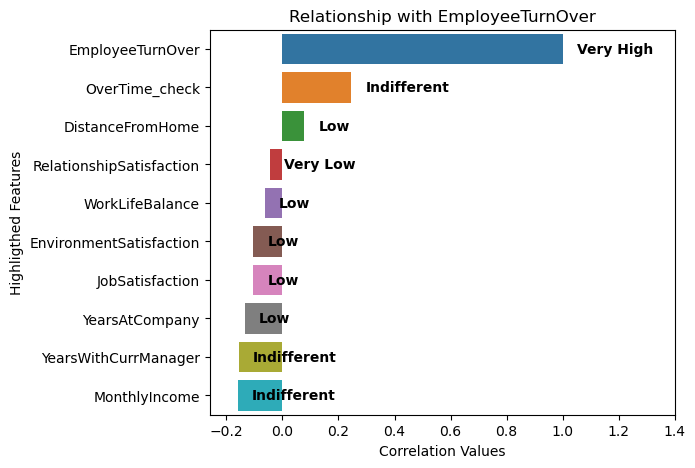

In [14]:
# Use chart to visualize the causes of attrition and correlation:

plt.figure(figsize=(6, 5))
sns.barplot(x=data_correlation.values, y=data_correlation.index, palette='tab10')

plt.xlim(data_correlation.min()- 0.10, data_correlation.max() + 0.4)

for x, i in attrition_values.items():
    y_loc = data_correlation.index.get_loc(x)
    plt.text(data_correlation[x] + 0.05, y_loc, i, va='center', fontweight='bold', color='black')

plt.title('Relationship with EmployeeTurnOver')
plt.xlabel('Correlation Values')
plt.ylabel('Highligthed Features')
plt.show()

### Question 2: Predict the job roles that are likely to resign the company within the current year and why?

In [15]:
if 'JobRole' in df.columns:
    attrition_by_jobrole = df.groupby('JobRole')['EmployeeTurnOver'].mean().sort_values(ascending=False)
    print("Attrition Rate jobrole (%):\n")
    print((attrition_by_jobrole * 100).round(2))   

Attrition Rate jobrole (%):

JobRole
Sales Representative         39.76
Laboratory Technician        23.94
Human Resources              23.08
Sales Executive              17.48
Research Scientist           16.10
Manufacturing Director        6.90
Healthcare Representative     6.87
Manager                       4.90
Research Director             2.50
Name: EmployeeTurnOver, dtype: float64


In [16]:
df['Sales_jobrole'] = df['JobRole'] == 'Sales_jobrole'
df.drop('Sales_jobrole', axis=1, inplace=True)

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,0


In [18]:
# The result from the groupby JobRole and Attrition, it shows that Sales Rep is likely the role with the highest attrition rate.
# Thus, I'm going to take Sales Rep for futher analysis:
df['SalesRep'] = df['JobRole'] == 'Sales Representative'
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check,SalesRep
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,False
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,False


In [19]:
features = [
    'OverTime', 
    'JobSatisfaction', 
    'WorkLifeBalance', 
    'MonthlyIncome', 
    'YearsWithCurrManager']

def percentage_overtime(series):
    if series.dtype == 'object':
        return (series == 'Yes').mean() * 100
    else:
        return series.mean() * 100
    
comparison = df.groupby('SalesRep')[features].agg({
    'OverTime': percentage_overtime,
    'JobSatisfaction': 'mean',
    'WorkLifeBalance': 'mean',
    'MonthlyIncome': 'mean',
    'YearsWithCurrManager': 'mean'
}).rename(index={True: 'SalesRep', False: 'Other Roles'})

comparison.index = ['Other Roles', 'SalesRep']
comparison.columns = ['% OverTime', 'Job Satisfaction', 'Work-Life Balance', 
                      'Monthly Income ($)', 'Years w/ Manager']

print('\nComparison Between SalesRep and Others:\n')
print(comparison.round(2))


Comparison Between SalesRep and Others:

             % OverTime  Job Satisfaction  Work-Life Balance  \
Other Roles       28.26              2.73               2.75   
SalesRep          28.92              2.73               2.89   

             Monthly Income ($)  Years w/ Manager  
Other Roles             6734.93              4.27  
SalesRep                2626.00              1.66  


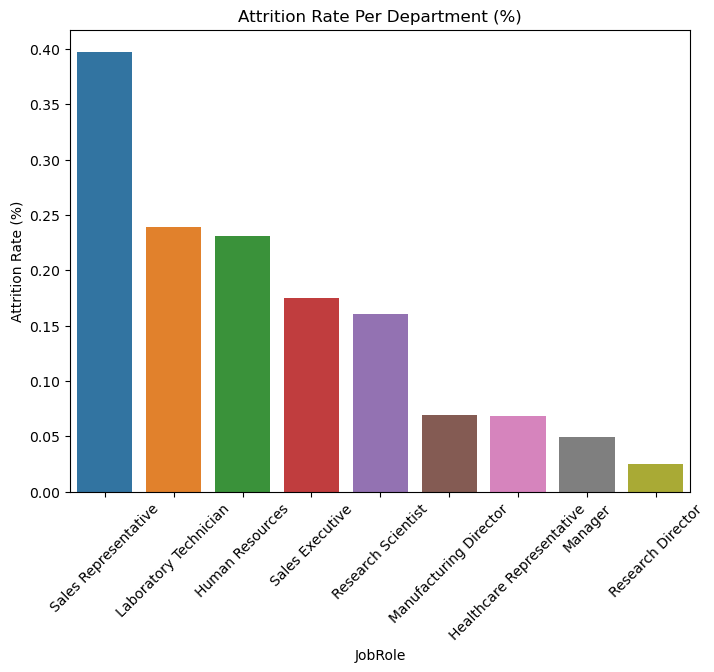

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_by_jobrole.index, y=attrition_by_jobrole.values, palette='tab10')
plt.title('Attrition Rate Per Department (%)')
plt.xticks(rotation=45)
plt.ylabel('Attrition Rate (%)')
plt.show()

In [21]:
# Create model for prediction:
model = RandomForestClassifier()

In [22]:
# Assign values to x and y:
x = df[['OverTime_check','MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany']]
y = df['EmployeeTurnOver'] 

In [23]:
print(x.shape)
print(y.shape)

(1470, 5)
(1470,)


In [24]:
# Train x and y:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape) 

(1176, 5) (1176,)
(294, 5) (294,)


In [26]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
probability_pred = model.predict_proba(x_test)[:, 1]

In [28]:
probability_pred

array([0.05, 0.3 , 0.46, 0.15, 0.01, 0.62, 0.  , 0.02, 0.02, 0.03, 0.56,
       0.  , 0.02, 0.84, 0.43, 0.06, 0.31, 0.03, 0.17, 0.14, 0.04, 0.  ,
       0.14, 0.18, 0.07, 0.64, 0.18, 0.01, 0.02, 0.01, 0.  , 0.  , 0.02,
       0.  , 0.28, 0.15, 0.  , 0.59, 0.39, 0.13, 0.02, 0.01, 0.11, 0.02,
       0.58, 0.  , 0.03, 0.13, 0.31, 0.69, 0.02, 0.05, 0.2 , 0.  , 0.  ,
       0.02, 0.43, 0.  , 0.  , 0.46, 0.01, 0.87, 0.01, 0.02, 0.31, 0.48,
       0.16, 0.04, 0.01, 0.  , 0.04, 0.03, 0.26, 0.02, 0.02, 0.14, 0.  ,
       0.06, 0.2 , 0.11, 0.  , 0.15, 0.08, 0.01, 0.34, 0.  , 0.59, 0.24,
       0.09, 0.  , 0.  , 0.15, 0.1 , 0.27, 0.  , 0.07, 0.05, 0.03, 0.34,
       0.03, 0.31, 0.06, 0.04, 0.07, 0.  , 0.08, 0.08, 0.08, 0.  , 0.09,
       0.24, 0.08, 0.03, 0.32, 0.61, 0.  , 0.36, 0.58, 0.  , 0.  , 0.43,
       0.05, 0.01, 0.19, 0.05, 0.66, 0.03, 0.  , 0.  , 0.03, 0.01, 0.39,
       0.25, 0.  , 0.  , 0.  , 0.43, 0.23, 0.34, 0.02, 0.32, 0.4 , 0.04,
       0.02, 0.04, 0.  , 0.16, 0.36, 0.85, 0.22, 0.

In [43]:
probability_pred = np.array([0.04, 0.2 , 0.41, 0.17, 0.  , 0.65, 0.  , 0.02, 0.  , 0.03, 0.55,
       0.03, 0.04, 0.84, 0.46, 0.04, 0.34, 0.04, 0.2 , 0.09, 0.03, 0.  ,
       0.1 , 0.1 , 0.02, 0.59, 0.13, 0.01, 0.  , 0.  , 0.01, 0.  , 0.02,
       0.01, 0.32, 0.17, 0.01, 0.57, 0.39, 0.17, 0.02, 0.  , 0.14, 0.03,
       0.61, 0.  , 0.05, 0.13, 0.28, 0.76, 0.02, 0.06, 0.16, 0.  , 0.  ,
       0.04, 0.48, 0.  , 0.  , 0.42, 0.02, 0.9 , 0.03, 0.02, 0.27, 0.43,
       0.15, 0.08, 0.02, 0.01, 0.03, 0.01, 0.22, 0.  , 0.02, 0.09, 0.  ,
       0.05, 0.23, 0.13, 0.  , 0.14, 0.06, 0.05, 0.26, 0.  , 0.49, 0.19,
       0.2 , 0.  , 0.  , 0.17, 0.16, 0.26, 0.02, 0.02, 0.  , 0.04, 0.33,
       0.02, 0.35, 0.07, 0.05, 0.04, 0.  , 0.06, 0.09, 0.13, 0.04, 0.17,
       0.17, 0.03, 0.02, 0.29, 0.49, 0.  , 0.25, 0.62, 0.01, 0.  , 0.39,
       0.06, 0.02, 0.18, 0.04, 0.67, 0.03, 0.  , 0.  , 0.01, 0.02, 0.48,
       0.24, 0.  , 0.  , 0.  , 0.44, 0.27, 0.33, 0.08, 0.24, 0.39, 0.03,
       0.  , 0.08, 0.01, 0.16, 0.41, 0.89, 0.13, 0.  , 0.05, 0.18, 0.62,
       0.05, 0.13, 0.05, 0.  , 0.02, 0.03, 0.  , 0.01, 0.04, 0.38, 0.02,
       0.23, 0.02, 0.14, 0.13, 0.03, 0.06, 0.01, 0.59, 0.  , 0.07, 0.83,
       0.  , 0.24, 0.08, 0.09, 0.09, 0.01, 0.24, 0.04, 0.06, 0.54, 0.  ,
       0.5 , 0.01, 0.  , 0.  , 0.13, 0.31, 0.06, 0.23, 0.23, 0.36, 0.09,
       0.  , 0.1 , 0.  , 0.  , 0.09, 0.31, 0.  , 0.03, 0.23, 0.  , 0.  ,
       0.22, 0.17, 0.22, 0.01, 0.24, 0.32, 0.03, 0.01, 0.  , 0.01, 0.14,
       0.24, 0.51, 0.05, 0.02, 0.  , 0.68, 0.16, 0.01, 0.04, 0.11, 0.15,
       0.25, 0.34, 0.27, 0.03, 0.  , 0.01, 0.39, 0.02, 0.28, 0.09, 0.  ,
       0.21, 0.11, 0.08, 0.05, 0.  , 0.07, 0.01, 0.07, 0.04, 0.01, 0.29,
       0.  , 0.7 , 0.  , 0.03, 0.01, 0.37, 0.  , 0.08, 0.35, 0.38, 0.13,
       0.03, 0.11, 0.05, 0.04, 0.  , 0.36, 0.02, 0.02, 0.08, 0.14, 0.01,
       0.  , 0.19, 0.09, 0.13, 0.01, 0.02, 0.69, 0.2 , 0.21, 0.22, 0.18,
       0.12, 0.15, 0.42, 0.  , 0.09, 0.2 , 0.03, 0.08

])
df.loc[x_test.index, 'AttritionProbability'] = probability_pred

# Group by department and calculate mean attrition probability
role_risk = df.groupby('JobRole')['AttritionProbability'].mean().sort_values(ascending=False)

print('JobRole Attrition Risk (Highest to Lowest):')
print(role_risk.round(2))

JobRole Attrition Risk (Highest to Lowest):
JobRole
Sales Representative         0.40
Human Resources              0.23
Research Scientist           0.18
Manager                      0.16
Laboratory Technician        0.15
Manufacturing Director       0.15
Healthcare Representative    0.11
Sales Executive              0.11
Research Director            0.05
Name: AttritionProbability, dtype: float64


In [30]:
df = df.dropna(subset=['AttritionProbability']).reset_index(drop=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check,SalesRep,AttritionProbability
0,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,1,3,10,9,8,8,0,0,False,0.62
1,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,6,3,0,0,0,0,0,0,False,0.17
2,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,2,2,2,2,2,1,0,0,False,0.01
3,33,No,Travel_Rarely,924,Research & Development,2,3,Medical,1,39,...,3,3,1,1,0,0,0,0,False,0.03
4,30,No,Travel_Rarely,125,Research & Development,9,2,Medical,1,41,...,5,3,10,0,1,8,0,0,False,0.02


In [32]:
missing_indices = x_test.index.difference(df.index)
print("Missing indices:", missing_indices)

Missing indices: Index([ 297,  303,  306,  309,  310,  316,  322,  324,  332,  339,
       ...
       1403, 1406, 1418, 1419, 1422, 1423, 1441, 1458, 1463, 1468],
      dtype='int64', length=240)


In [41]:
print("df shape:", df.shape)
print("x_test shape:", x_test.shape)
print("Common indices:", len(x_test.index.intersection(df.index)))

df shape: (1470, 37)
x_test shape: (294, 5)
Common indices: 294


In [44]:
valid_index = x_test.index.intersection(df.index)

print(
    df.loc[valid_index, ['JobRole', 'AttritionProbability']]
      .sort_values(by='AttritionProbability', ascending=False)
      .head()
)

                    JobRole  AttritionProbability
777   Laboratory Technician                  0.90
101      Research Scientist                  0.89
361   Laboratory Technician                  0.84
1087   Sales Representative                  0.83
892      Research Scientist                  0.76


In [45]:
# Determine the department with the highest attrition risk
high_risk_dept_employee = df.groupby('JobRole')['AttritionProbability'].max().sort_values(ascending=False)
print("Depts with Highest-Risk Employees:\n", high_risk_dept_employee)

Depts with Highest-Risk Employees:
 JobRole
Laboratory Technician        0.90
Research Scientist           0.89
Sales Representative         0.83
Manufacturing Director       0.70
Sales Executive              0.69
Human Resources              0.67
Manager                      0.59
Healthcare Representative    0.50
Research Director            0.20
Name: AttritionProbability, dtype: float64


In [46]:
# Count the department with the highest job role attrition
limit = 0.50
high_dept_employee_counts = df[df['AttritionProbability'] > limit].groupby('JobRole').size()
print("Depts with Most High-Risk Employees:\n", high_dept_employee_counts)

Depts with Most High-Risk Employees:
 JobRole
Human Resources           1
Laboratory Technician     5
Manager                   1
Manufacturing Director    2
Research Scientist        5
Sales Executive           1
Sales Representative      4
dtype: int64


In [49]:
dept_employee_risk = df.groupby('JobRole')['AttritionProbability'].agg(['mean', 'max'])
dept_employee_risk['weighted_score'] = 0.7 * dept_employee_risk['max'] + 0.3 * dept_employee_risk['mean'] 
print(dept_employee_risk.sort_values('weighted_score', ascending=False))

                               mean   max  weighted_score
JobRole                                                  
Sales Representative       0.401250  0.83        0.701375
Research Scientist         0.184200  0.89        0.678260
Laboratory Technician      0.150727  0.90        0.675218
Human Resources            0.227000  0.67        0.537100
Manufacturing Director     0.147895  0.70        0.534368
Sales Executive            0.105278  0.69        0.514583
Manager                    0.160870  0.59        0.461261
Healthcare Representative  0.105769  0.50        0.381731
Research Director          0.052500  0.20        0.155750


In [50]:
print(df.nlargest(10, 'AttritionProbability')[['JobRole', 'AttritionProbability']])

                     JobRole  AttritionProbability
777    Laboratory Technician                  0.90
101       Research Scientist                  0.89
361    Laboratory Technician                  0.84
1087    Sales Representative                  0.83
892       Research Scientist                  0.76
1229  Manufacturing Director                  0.70
354          Sales Executive                  0.69
889       Research Scientist                  0.68
422          Human Resources                  0.67
494     Sales Representative                  0.65


In [51]:
top_dept_attrition_counts = high_dept_employee_counts.reset_index()
top_dept_attrition_counts.columns = ['JobRole', 'Count']

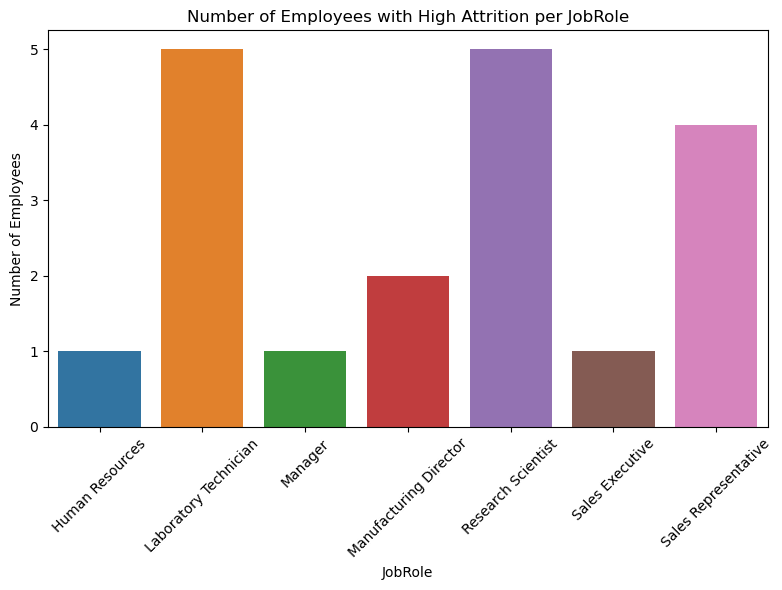

In [52]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_dept_attrition_counts, x='JobRole', y='Count', palette='tab10')

plt.title('Number of Employees with High Attrition per JobRole')
plt.ylabel('Number of Employees')
plt.xlabel('JobRole')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Identify the reason for possible attrition by overall department average:

risk_attrition_depts = ['Laboratory Technician', 'Research Scientist', 'Sales Representative']
print("High-Attrition Roles:", risk_attrition_depts)

measures = {
    'MonthlyIncome': 'Average Salary',
    'JobSatisfaction': 'Job Satisfaction (1-5)',
    'OverTime': '% Working Overtime',
    'WorkLifeBalance': 'Work-Life Balance (1-5)',
    'YearsWithCurrManager': 'Avg. Years with Manager'
}

for x in risk_attrition_depts:
    sales_dt = df[df['JobRole'] == x]
    other_dt = df[df['JobRole'] != x]
    
    print(f"\n Analysis for {x}")
    
    for col, label in measures.items():
        if col == 'OverTime':
            sales_val = (sales_dt[col] == 'Yes').mean() * 100
            other_val = (other_dt[col] == 'Yes').mean() * 100
            print(f"{label}: {sales_val:.2f}% (vs. Others: {other_val:.2f}%)")
        else:
            sales_val = sales_dt[col].mean()
            other_val = other_dt[col].mean()
            print(f"{label}: {sales_val:.2f} (vs. Others: {other_val:.2f})")

High-Attrition Roles: ['Laboratory Technician', 'Research Scientist', 'Sales Representative']

 Analysis for Laboratory Technician
Average Salary: 3237.17 (vs. Others: 7201.39)
Job Satisfaction (1-5): 2.69 (vs. Others: 2.74)
% Working Overtime: 23.94% (vs. Others: 29.23%)
Work-Life Balance (1-5): 2.72 (vs. Others: 2.77)
Avg. Years with Manager: 3.30 (vs. Others: 4.30)

 Analysis for Research Scientist
Average Salary: 3239.97 (vs. Others: 7311.75)
Job Satisfaction (1-5): 2.77 (vs. Others: 2.72)
% Working Overtime: 33.22% (vs. Others: 27.08%)
Work-Life Balance (1-5): 2.68 (vs. Others: 2.78)
Avg. Years with Manager: 3.21 (vs. Others: 4.35)

 Analysis for Sales Representative
Average Salary: 2626.00 (vs. Others: 6734.93)
Job Satisfaction (1-5): 2.73 (vs. Others: 2.73)
% Working Overtime: 28.92% (vs. Others: 28.26%)
Work-Life Balance (1-5): 2.89 (vs. Others: 2.75)
Avg. Years with Manager: 1.66 (vs. Others: 4.27)


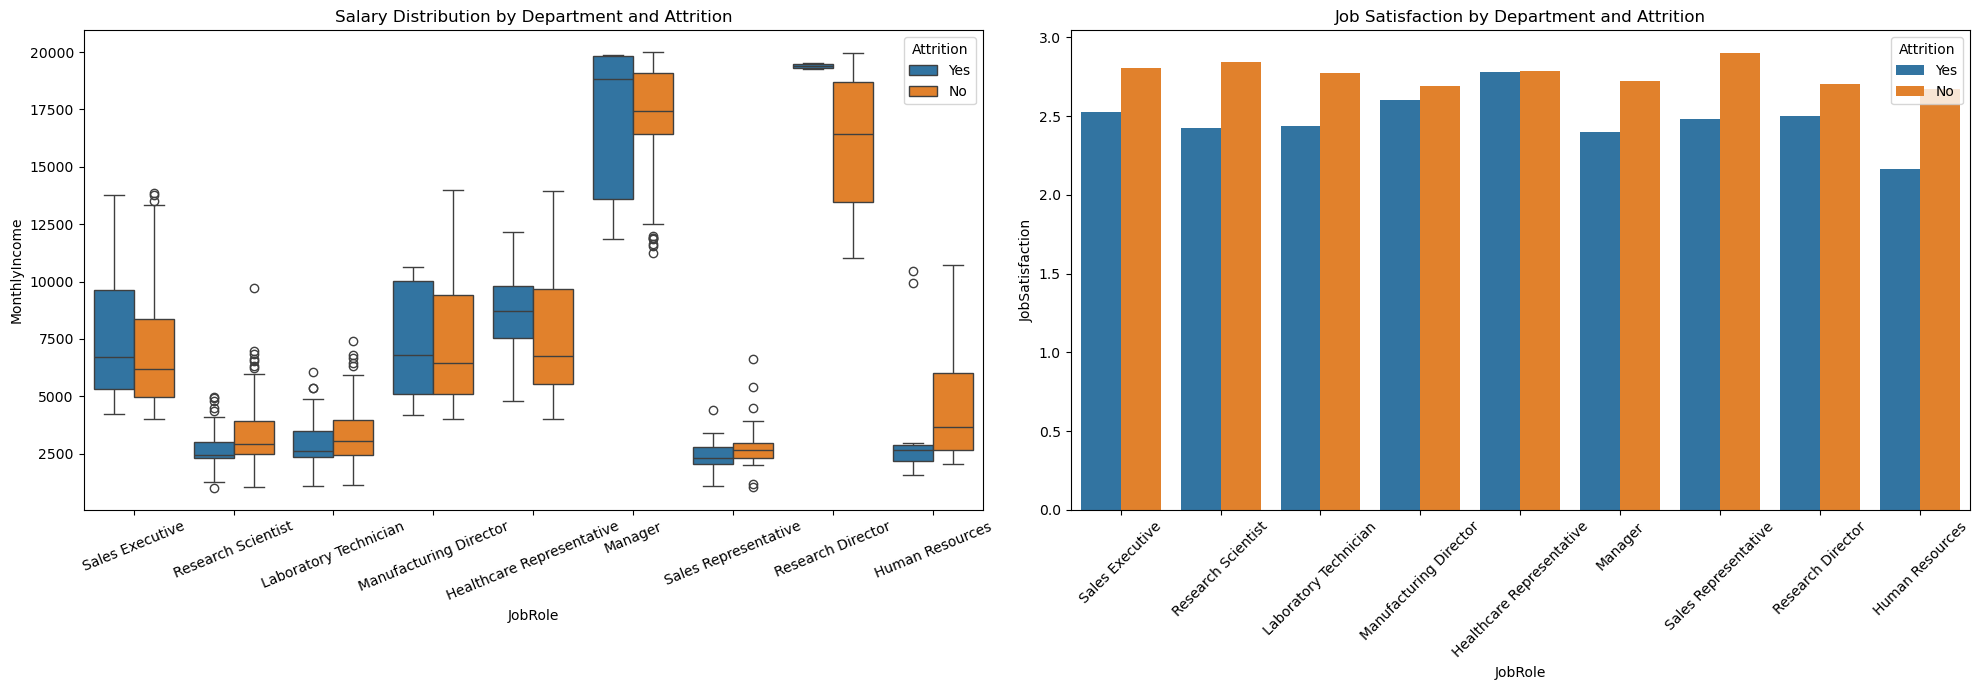

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, ax=axes[0])
axes[0].set_title('Salary Distribution by Department and Attrition')
axes[0].tick_params(axis='x', rotation=22.5)


sns.barplot(x='JobRole', y='JobSatisfaction', hue='Attrition', data=df, ci=None, ax=axes[1])
axes[1].set_title('Job Satisfaction by Department and Attrition')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [1]:
# From the forgoing, it's very obvious that salary is the major reason for attrition in Indicino Company.
def print_reason_for_attrition(values):
    """Prints the key observation that salary, overtime and minimally job satisfaction appear to be the primary drivers of attrition in Indicino Company."""
    
    print("DEPARTMENTAL RETENTION PLANS")
    print("=" * 50 + "\n")
    print("From the analysis above, it is evident that salary, overtime, and minimally, job satisfaction play significant roles in employee attrition at Indicino Company.\n"
          "It showed that departments with lower average salaries, high percentage overtime tend to have higher attrition rates.\n")
print_reason_for_attrition(None)

DEPARTMENTAL RETENTION PLANS

From the analysis above, it is evident that salary, overtime, and minimally, job satisfaction play significant roles in employee attrition at Indicino Company.
It showed that departments with lower average salaries, high percentage overtime tend to have higher attrition rates.



### Question 3: What age band (s) are likely to be retained?

In [56]:
bracket_age_bins = [20, 30, 40, 50, 60]
age_bracket = ['20-30', '30-40', '40-50', '50-60']
df['age_band_retention'] = pd.cut(df['Age'], bins=bracket_age_bins, labels=age_bracket)

if 'age_band_retention' in df.columns:
    age_retention =(
        df.groupby('age_band_retention')['EmployeeTurnOver']
        .mean()
        .rename("mean_attrition_band")
    )
print(age_retention.round(2))

age_band_retention
20-30    0.23
30-40    0.14
40-50    0.11
50-60    0.13
Name: mean_attrition_band, dtype: float64


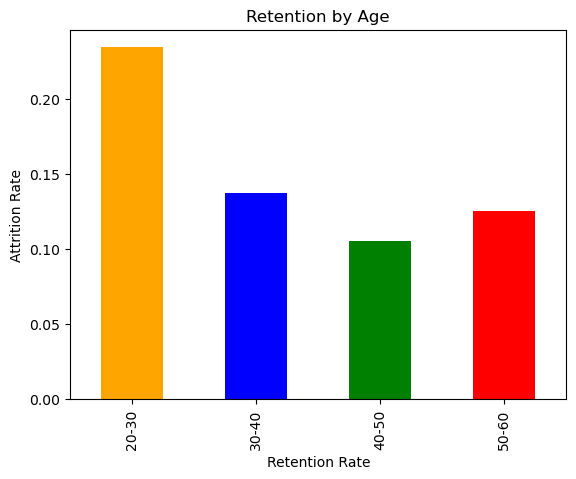

In [57]:
age_retention.plot(kind='bar', color=['orange','blue', 'green', 'red'])
plt.title('Retention by Age')
plt.xlabel('Retention Rate')
plt.ylabel('Attrition Rate')
plt.show()

### Question 4: If you were the Group Head of Indicino’s HR, what would you do differently?

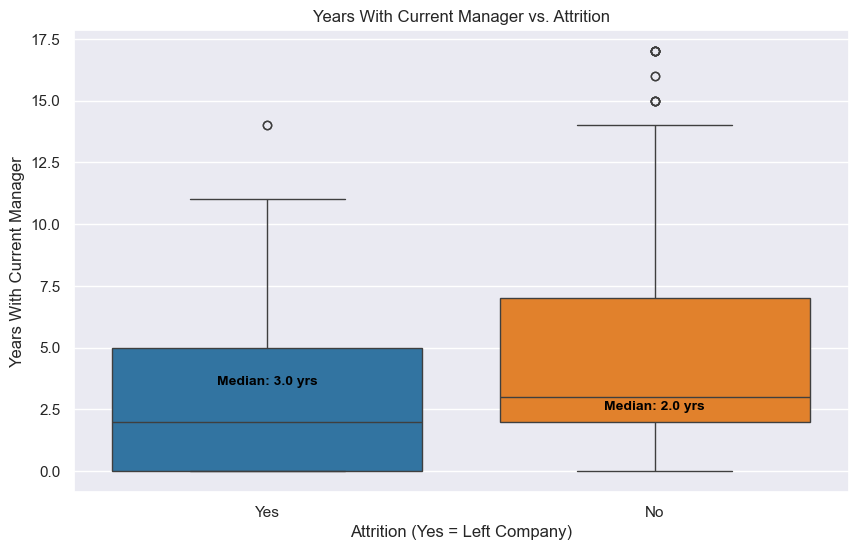

In [58]:
# First step: visualize the relationships between manager years in office and it's affect on attrition. 

sns.set(style='darkgrid')

if 'Attrition' in df.columns and 'YearsWithCurrManager' in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='tab10')
    plt.title('Years With Current Manager vs. Attrition')
    plt.xlabel('Attrition (Yes = Left Company)')
    plt.ylabel('Years With Current Manager')

    medians = df.groupby('Attrition')['YearsWithCurrManager'].median()
    for tick, label in enumerate(ax.get_xticklabels()):
        ax.text(
            tick, 
            medians[tick] + 0.5,
            f"Median: {medians[tick]:.1f} yrs", 
            horizontalalignment='center', 
            size='small', 
            color='black', 
            weight='semibold'
        )

    plt.show()
else:
    print('Columns not found')

In [59]:
# Second step: Highkight and visualize footsteps identified to tackle attrition in Indicino Company:
# 1: Identify attrition by department
attrition_by_role = df.groupby('JobRole')['EmployeeTurnOver'].mean().sort_values(ascending=False)

print(" Attrition Rate by Job Role (%):")
print((attrition_by_role * 100).round(2))

 Attrition Rate by Job Role (%):
JobRole
Sales Representative         39.76
Laboratory Technician        23.94
Human Resources              23.08
Sales Executive              17.48
Research Scientist           16.10
Manufacturing Director        6.90
Healthcare Representative     6.87
Manager                       4.90
Research Director             2.50
Name: EmployeeTurnOver, dtype: float64


In [60]:
df = pd.read_excel(filepath)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [65]:
#2: Identify attrition by individual role:
limit = 0.50
high_risk_jobroles = df[df['AttritionProbability'] > limit]['JobRole'].unique().tolist()

priority_jobroles = ['Laboratory Technician', 'Research Scientist', 'Sales Representative', 'Manufacturing Director', 'Sales Executive', 'Human Resources', 'Manager']

ordered_job_roles = [role for role in priority_jobroles if role in high_risk_jobroles]

print("\nHigh-Risk Roles (Attrition Probability > 50%):")
if ordered_job_roles:
    for i, role in enumerate(ordered_job_roles, 1):
        print(f"{i}. {role}")
else:
    print("No roles exceed the 50% attrition threshold.")


High-Risk Roles (Attrition Probability > 50%):
1. Laboratory Technician
2. Research Scientist
3. Sales Representative
4. Manufacturing Director
5. Sales Executive
6. Human Resources
7. Manager


In [68]:
print("high-risk roles (attrition > 50%):")
print(high_risk_jobroles)

print("Priority roles:")
print(priority_jobroles)

print("Filtered ordered roles:")
print(ordered_job_roles)

high-risk roles (attrition > 50%):
['Manufacturing Director', 'Research Scientist', 'Laboratory Technician', 'Sales Executive', 'Sales Representative', 'Human Resources', 'Manager']
Priority roles:
['Laboratory Technician', 'Research Scientist', 'Sales Representative', 'Manufacturing Director', 'Sales Executive', 'Human Resources', 'Manager']
Filtered ordered roles:
['Laboratory Technician', 'Research Scientist', 'Sales Representative', 'Manufacturing Director', 'Sales Executive', 'Human Resources', 'Manager']


In [70]:
#3: Determine how many individual employees are going to leave the company if apprepriate measures are not taken: 

df['Flag_HighRiskRole'] = df['JobRole'].isin(high_risk_jobroles)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTurnOver,OverTime_check,AttritionProbability,Flag_HighRiskRole
0,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,1,3,10,9,8,8,0,0,0.62,True
1,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,6,3,0,0,0,0,0,0,0.17,True
2,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,2,2,2,2,2,1,0,0,0.01,True
3,33,No,Travel_Rarely,924,Research & Development,2,3,Medical,1,39,...,3,3,1,1,0,0,0,0,0.03,True
4,30,No,Travel_Rarely,125,Research & Development,9,2,Medical,1,41,...,5,3,10,0,1,8,0,0,0.02,True


In [71]:
# Count the number of high risk roles:
high_risk_counts = df[df['JobRole'].isin(high_risk_jobroles)]['JobRole'].value_counts()

print("\nEmployee Count in High-Risk Roles:")
print(high_risk_counts.to_string())

print("\nAttrition in High-Risk Roles:")
flagged_employees = df[df['JobRole'].isin(high_risk_jobroles)]

if 'EmployeeTurnOver' in df.columns:
    attrition_counts = flagged_employees['EmployeeTurnOver'].value_counts()
    attrition_rate = flagged_employees['EmployeeTurnOver'].mean() * 100
elif 'Attrition' in df.columns:
    attrition_counts = flagged_employees['Attrition'].value_counts()
    attrition_rate = (flagged_employees['Attrition'] == 'Yes').mean() * 100

print(attrition_counts)
print(f"\nAttrition rate in high-risk roles: {attrition_rate:.1f}%")

if 'EmployeeTurnOver' in df.columns:
    overall_rate = df['EmployeeTurnOver'].mean() * 100
elif 'Attrition' in df.columns:
    overall_rate = (df['Attrition'] == 'Yes').mean() * 100

print(f"Overall company attrition rate: {overall_rate:.1f}%")
print(f"Risk multiplier: {attrition_rate/overall_rate:.1f}x")


Employee Count in High-Risk Roles:
JobRole
Sales Executive           72
Laboratory Technician     55
Research Scientist        50
Manufacturing Director    38
Manager                   23
Human Resources           10
Sales Representative       8

Attrition in High-Risk Roles:
EmployeeTurnOver
0    221
1     35
Name: count, dtype: int64

Attrition rate in high-risk roles: 13.7%
Overall company attrition rate: 13.3%
Risk multiplier: 1.0x


In [72]:
#4: Suggested  measures to tackle attrition in Indicino Company:

Measures_to_tackle_attrition = {
    'Tackle Salary Deficiency': [
        'create a supportive and conducive work environment',
        'Assign peer mentor',
        'Offer commission stability plan/incentive',
        'Review sales target fairness'
        
    ],
    'Solve the problem of OverTime And Minimize Age Band Attrition': [
        'Set only achieveable goals to minimize overwork',
        'Foster culture of innovation',
        'Foster culture of collaboration to enhance positive work experience',
        'Encourage worker-managment relationship to avoid felling of hostility by new employees'
    ],
    ' Create Positive cooperation Among Workers': [
        'Flexible scheduling',
        'Leadership shadow program to create effective job satisafaction',
        'create salary increment scheme'
    ]
}

def print_attrition_measures(measures_dict):
    """Prints department-specific attrition measures in a formatted way"""
    
    print("DEPARTMENTAL RETENSION PLANS")
    print("="*50 + "\n")
    
    for department, actions in measures_dict.items():
        print(f"► {department.upper()}")
        for i, action in enumerate(actions, 1):
            print(f"  {i}. {action}")
        print() 

print_attrition_measures(Measures_to_tackle_attrition)

DEPARTMENTAL RETENSION PLANS

► TACKLE SALARY DEFICIENCY
  1. create a supportive and conducive work environment
  2. Assign peer mentor
  3. Offer commission stability plan/incentive
  4. Review sales target fairness

► SOLVE THE PROBLEM OF OVERTIME AND MINIMIZE AGE BAND ATTRITION
  1. Set only achieveable goals to minimize overwork
  2. Foster culture of innovation
  3. Foster culture of collaboration to enhance positive work experience
  4. Encourage worker-managment relationship to avoid felling of hostility by new employees

►  CREATE POSITIVE COOPERATION AMONG WORKERS
  1. Flexible scheduling
  2. Leadership shadow program to create effective job satisafaction
  3. create salary increment scheme



### Question 5: Does the length of stay with the current manager have any impact on the reason(s) you have identified in 1

In [84]:
correlation = df[['EmployeeTurnOver','YearsWithCurrManager']].corr().iloc[0,1]
print(f"Correlation: {correlation:.2f}")

Correlation: -0.16


CORRELATION BETWEEN MANAGER TENURE AND ATTRITION PROBABILITY: -0.16



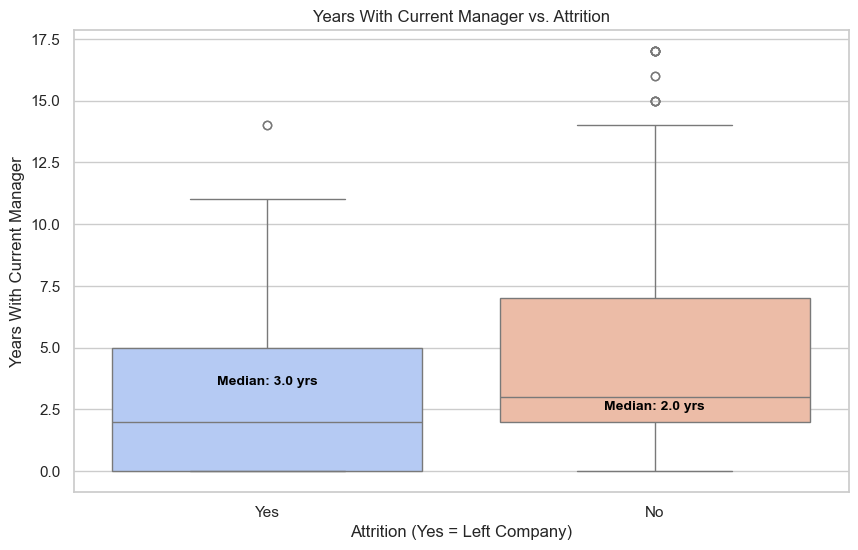

In [83]:
correlation = df[['EmployeeTurnOver','YearsWithCurrManager']].corr().iloc[0,1]

print(f"CORRELATION BETWEEN MANAGER TENURE AND ATTRITION PROBABILITY: {correlation:.2f}")
print("="*50 + "\n")

sns.set(style='whitegrid')

if 'EmployeeTurnOver' in df.columns and 'YearsWithCurrManager' in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, palette='coolwarm')
    plt.title('Years With Current Manager vs. Attrition')
    plt.xlabel('Attrition (Yes = Left Company)')
    plt.ylabel('Years With Current Manager')

    medians = df.groupby('Attrition')['YearsWithCurrManager'].median()
    for tick, label in enumerate(ax.get_xticklabels()):
        ax.text(
            tick, 
            medians[tick] + 0.5,
            f"Median: {medians[tick]:.1f} yrs", 
            horizontalalignment='center', 
            size='small', 
            color='black', 
            weight='semibold'
        )

    plt.show()
else:
    print('Columns not found')

### Question 6: Give insights to the performance and rewards culture at Indicino

In [82]:
# Insight 1: Count the performance rating distribution in Indicino Company
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

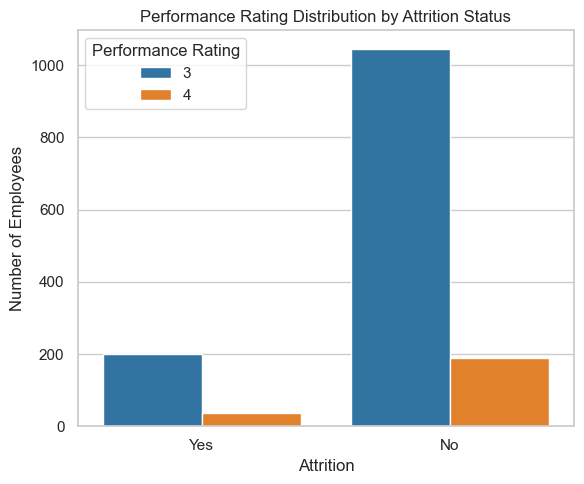

In [85]:
# Plot the chart to show the indiference in the performance culture
plt.figure(figsize=(6, 5))
sns.countplot(
    x='Attrition',
    hue='PerformanceRating',
    data=df,
    palette='tab10'
)
plt.title("Performance Rating Distribution by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()

In [86]:
# Insight 2: Evaluate Job Role salaries and the percentage salary hike to infer the salary per category and it's contribution to attrition:
df.groupby('PerformanceRating')['PercentSalaryHike'].mean()

PerformanceRating
3    14.003215
4    21.849558
Name: PercentSalaryHike, dtype: float64

In [87]:
print(df.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].median().unstack().fillna(0))

Attrition                       No      Yes
JobRole                                    
Healthcare Representative   6768.0   8722.0
Human Resources             3668.5   2652.5
Laboratory Technician       3068.0   2603.0
Manager                    17444.0  18824.0
Manufacturing Director      6447.0   6812.5
Research Director          16417.5  19395.5
Research Scientist          2936.0   2461.0
Sales Executive             6201.0   6728.0
Sales Representative        2643.0   2325.0


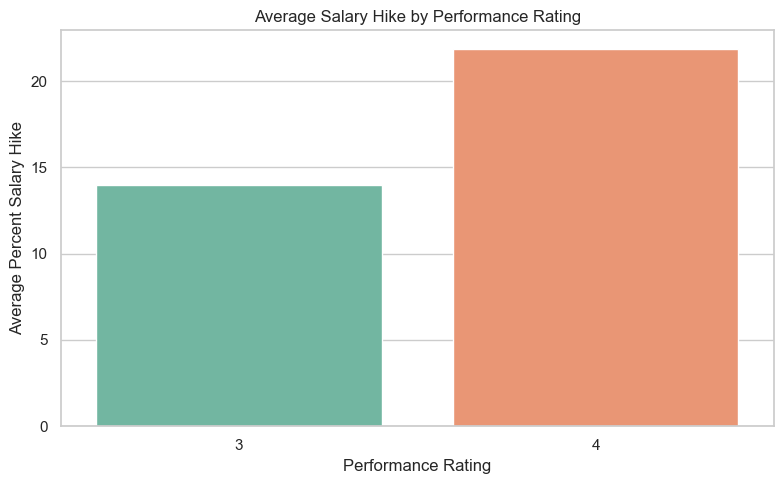

In [88]:
avg_percentage_salary_hike = df.groupby('PerformanceRating')['PercentSalaryHike'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='PerformanceRating',
    y='PercentSalaryHike',
    data=avg_percentage_salary_hike,
    palette='Set2'
)
plt.title("Average Salary Hike by Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Average Percent Salary Hike")
plt.tight_layout()
plt.show()

In [89]:
# Insight 3: Asses Company's OverTime compensation culture:

print(pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100)

Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


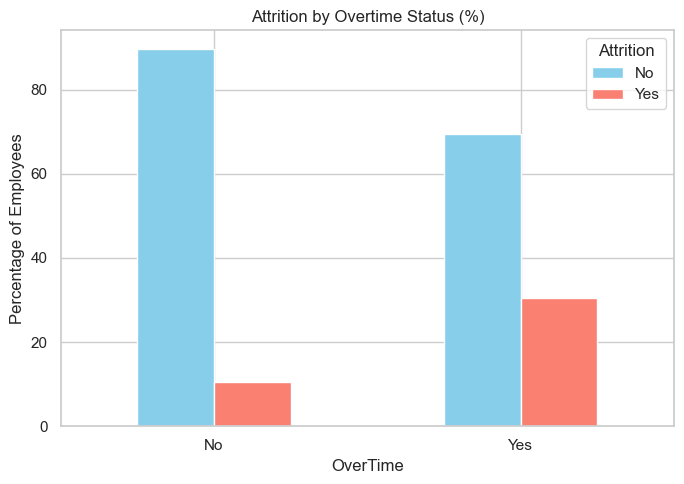

In [90]:
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

overtime_attrition.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(7, 5))

plt.title("Attrition by Overtime Status (%)")
plt.xlabel("OverTime")
plt.ylabel("Percentage of Employees")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [91]:
# Insight 5:  Evaluate the company's attitude towards limited ownership incentives that either encourage or discourage employee's sense of belonging.
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

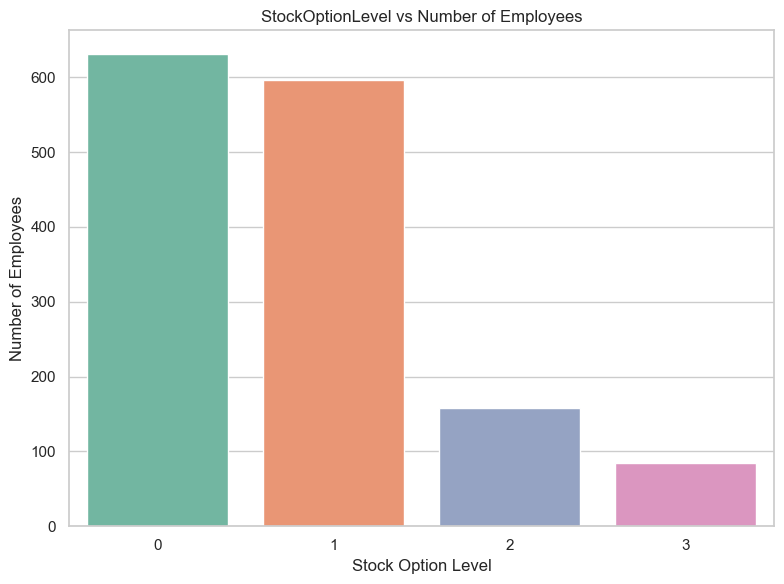

In [92]:
stock_option_summary = df['StockOptionLevel'].value_counts().reset_index()
stock_option_summary.columns = ['StockOptionLevel', 'Number of Employees']

plt.figure(figsize=(8, 6))
sns.barplot(
    x='StockOptionLevel',
    y='Number of Employees',
    data=stock_option_summary,
    palette='Set2'
)
plt.title("StockOptionLevel vs Number of Employees")
plt.xlabel('Stock Option Level')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

In [93]:
# Insight 5: From the overall insight above, determine whether the performance culture encourage job satisfaction.
df['JobSatisfaction'].value_counts(normalize=True)

JobSatisfaction
4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: proportion, dtype: float64

In [94]:
correlation_features = ['MonthlyIncome', 'PerformanceRating', 'StockOptionLevel', 'EmployeeTurnOver']
correlation_matrix = df[correlation_features].corr()
print("\n Correlation with Attrition:\n")
print(correlation_matrix['EmployeeTurnOver'].sort_values(ascending=False))


 Correlation with Attrition:

EmployeeTurnOver     1.000000
PerformanceRating    0.002889
StockOptionLevel    -0.137145
MonthlyIncome       -0.159840
Name: EmployeeTurnOver, dtype: float64


Job Satisfaction Insight:

However the count of job satisfaction suggests that employees with high job satisfaction have the highest attrition rate, evidence from other insights,
suggest that both salary, performance rating culture, and stock option level are the major causes of attrition in the company.


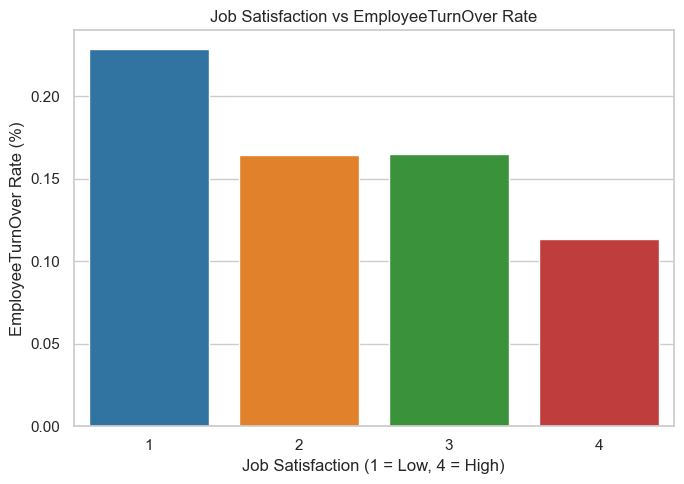

In [96]:
print(f"Job Satisfaction Insight:")
print("="*25 + "\n")
print("""However the count of job satisfaction suggests that employees with high job satisfaction have the highest attrition rate, evidence from other insights,
suggest that both salary, overtime, performance rating culture, and stock option level are the major causes of attrition in the company.""")
# Let's visualize to correlates the metrics.

job_sat_attrition = df.groupby('JobSatisfaction')['EmployeeTurnOver'].mean().reset_index()

job_sat_attrition['AttritionRate (%)'] = job_sat_attrition['EmployeeTurnOver'] * 100

plt.figure(figsize=(7, 5))
sns.barplot(
    x='JobSatisfaction', 
    y= 'EmployeeTurnOver',
    data=job_sat_attrition,
    palette='tab10'
)
plt.title('Job Satisfaction vs EmployeeTurnOver Rate')
plt.xlabel('Job Satisfaction (1 = Low, 4 = High)')
plt.ylabel('EmployeeTurnOver Rate (%)')
plt.tight_layout()
plt.show()

In [97]:
# Insight 5: Stall promotion: The gap between periods of last promotion and attrition correlates negativity.
correlation_feature = ['YearsSinceLastPromotion', 'PerformanceRating', 'EmployeeTurnOver']
correlation_matrix = df[correlation_feature].corr()
print("\n Correlation with YearsSinceLastPromotion:\n")
print(correlation_matrix['EmployeeTurnOver'].sort_values(ascending=False))


 Correlation with YearsSinceLastPromotion:

EmployeeTurnOver           1.000000
PerformanceRating          0.002889
YearsSinceLastPromotion   -0.033019
Name: EmployeeTurnOver, dtype: float64


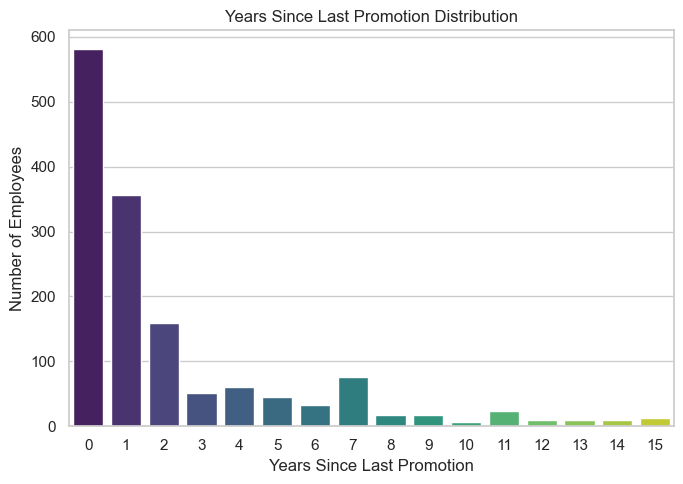

In [98]:
promotion_period = df['YearsSinceLastPromotion'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
sns.barplot(x=promotion_period.index, y=promotion_period.values, palette='viridis')
plt.title("Years Since Last Promotion Distribution")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

In [99]:
# Promotion distribution by Department
promotion_by_dept = df.groupby('Department')['YearsSinceLastPromotion'].value_counts().unstack().fillna(0)

promotion_by_dept

YearsSinceLastPromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Department,,,,,,,,,,,,,,,,
Human Resources,24.0,17.0,8.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Research & Development,379.0,243.0,103.0,37.0,39.0,26.0,21.0,43.0,13.0,10.0,4.0,14.0,7.0,7.0,7.0,8.0
Sales,178.0,97.0,48.0,12.0,19.0,16.0,11.0,30.0,5.0,7.0,1.0,10.0,2.0,3.0,2.0,5.0


In [100]:
print(f"Culture of Promotion in Indicino Company:")
print("="*42 + "\n")
print("While 'Years Since Last Promotion' value counts suggest that a large number of promotions occurred within the last 0 to 2 years in an obvious attempt to fight attrition,\n"
      "it however reveals a culture of stalled promotion velocity in Indicno Company, as shown on the above table, where few or zero promotion was recorded in the last 4 to 15 years.")

Culture of Promotion in Indicino Company:

While 'Years Since Last Promotion' value counts suggest that a large number of promotions occurred within the last 0 to 2 years in an obvious attempt to fight attrition,
it however reveals a culture of stalled promotion velocity in Indicno Company, as shown on the above table, where few or zero promotion was recorded in the last 4 to 15 years.


### **Culture of Promotion in Indicino Company**
#### While Years Since Last Promotio value_counts suggests that a large number of promotions occurred within the last 0 to 2 years in an obvious 
#### attempt to retain both newly employed workers and old workers alike, it however reveals a culture of stalled promotion velocity in Indicno
#### Company, as shown on the above table, where few or zero promotion was recorded in the last 4 to 15 years.

### **5 Measures To Solve Identified Performance Culture That Causes Attrition In Indicino Company** 

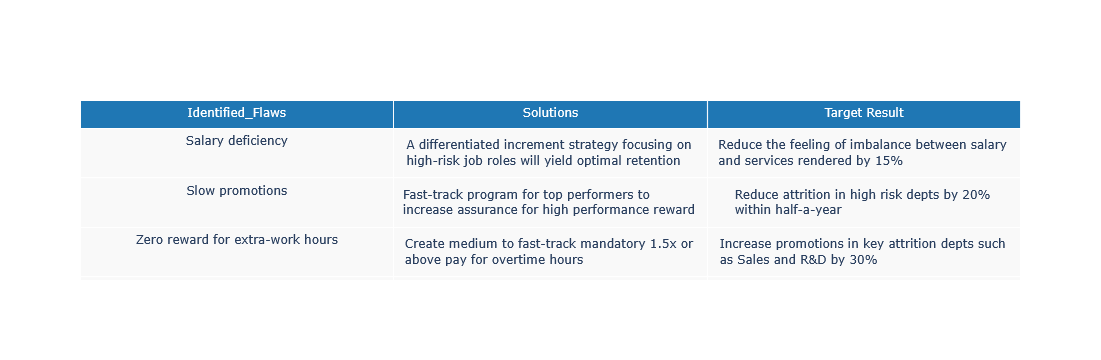

In [121]:
actionable_measures = {
    'Identified_Flaws': [
        'Salary deficiency',
        'Slow promotions',
        'Zero reward for extra-work hours',
        'Zero culture of workers inclusion',
        'Overtime burnout'
    ],
    'Solutions': [
        'A differentiated increment strategy focusing on high-risk job roles will yield optimal retention',
        'Fast-track program for top performers to increase assurance for high performance reward',
        'Create medium to fast-track mandatory 1.5x or above pay for overtime hours',
        'Adopt a method that ensures productive workers with two and above years in the company receive full stock option level',
        'Imbibe the attitude of quarterly target reviews with team input to reduce burnout'
    ],
    'Target Result': [
        'Reduce the feeling of imbalance between salary and services rendered by 15%',
        'Reduce attrition in high risk depts by 20% within half-a-year',
        'Increase promotions in key attrition depts such as Sales and R&D by 30%',
        'Increase recognition frequency by 50%',
        'Drop overtime attrition by 15%'
    ]
}

df = pd.DataFrame(actionable_measures)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='#1f77b4',
                font_color='white'),
    cells=dict(values=[df.Identified_Flaws, df.Solutions, df['Target Result']],
               fill_color='#f9f9f9'))
])

fig.show()